In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train=pd.read_csv('loan-train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [5]:
train.shape

(614, 13)

In [6]:
pd.crosstab(train["Credit_History"],train["Loan_Status"],margins=True)

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

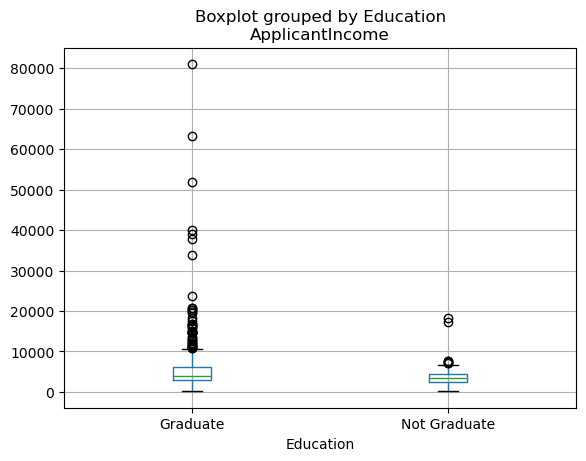

In [7]:
train.boxplot(column='ApplicantIncome', by='Education')

<AxesSubplot:>

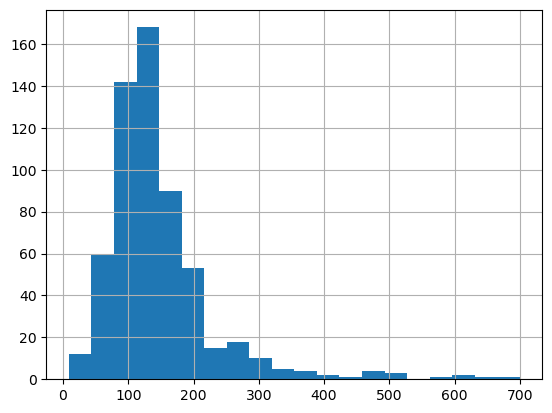

In [8]:
train["LoanAmount"].hist(bins=20)

# Checking the missing values

In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Preprocessing the data

In [10]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('loan-test.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4696\117233896.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [11]:
data.shape

(981, 12)

In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

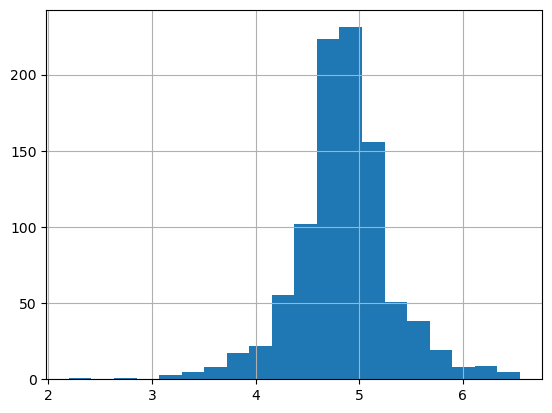

In [13]:
data["Loanamount_log"]=np.log(data["LoanAmount"])
data["Loanamount_log"].hist(bins=20)
#to normalize the loan amount

In [14]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loanamount_log       27
dtype: int64

In [15]:
data.Dependents.dtypes

dtype('O')

In [16]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

<AxesSubplot:>

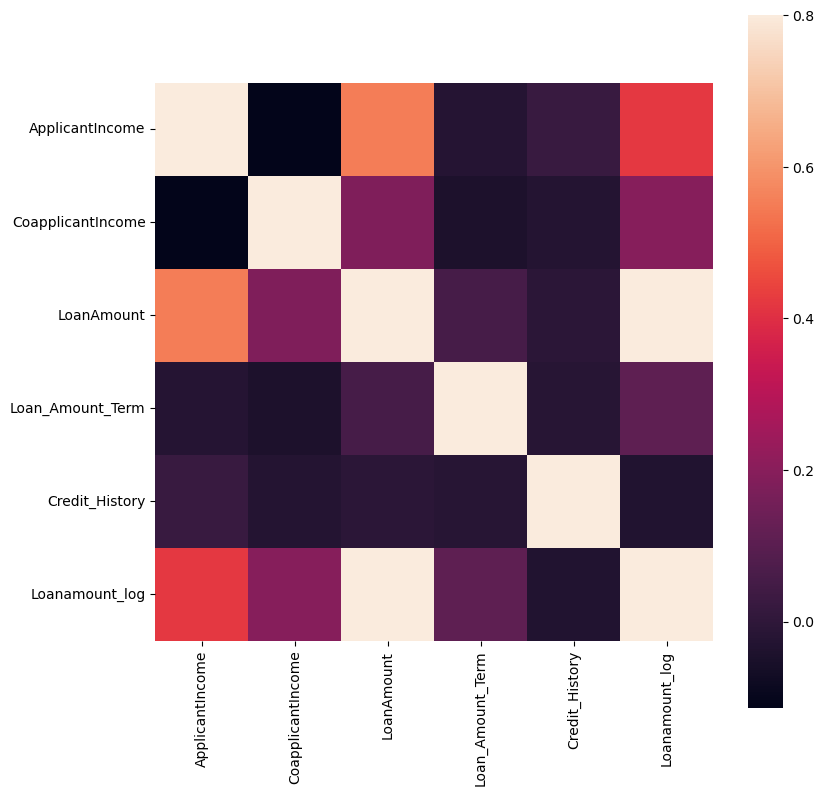

In [17]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)


# Label Encode

In [18]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [19]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})


In [20]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [21]:
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

In [22]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [23]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

<AxesSubplot:>

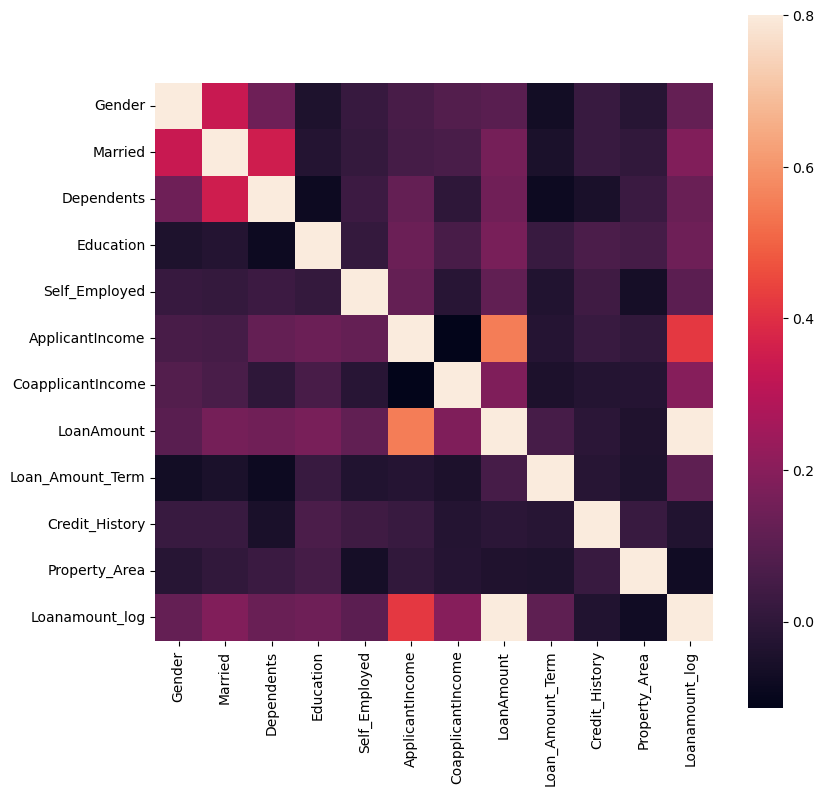

In [24]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

# Fill the missing values

In [25]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)
data.Married.fillna(np.random.randint(0,2),inplace=True)
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.Gender.fillna(np.random.randint(0,2),inplace=True)
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
data.Loanamount_log.fillna(data.Loanamount_log.mean(),inplace=True)

In [26]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loanamount_log       0
dtype: int64

In [27]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

<AxesSubplot:>

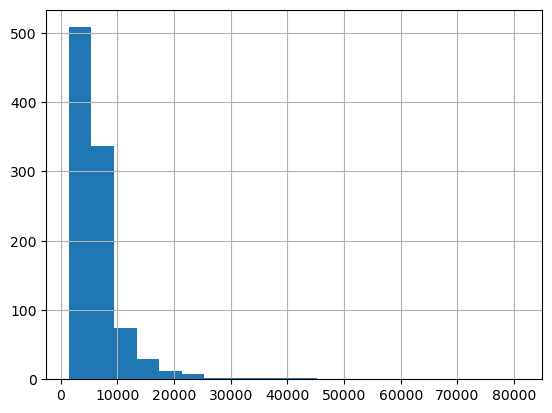

In [28]:
#Adding applicant and coapplicant income
data['Total_income']=data["ApplicantIncome"] + data["CoapplicantIncome"]
data['Total_income'].hist(bins=20)
#The total income is right skewed

<AxesSubplot:>

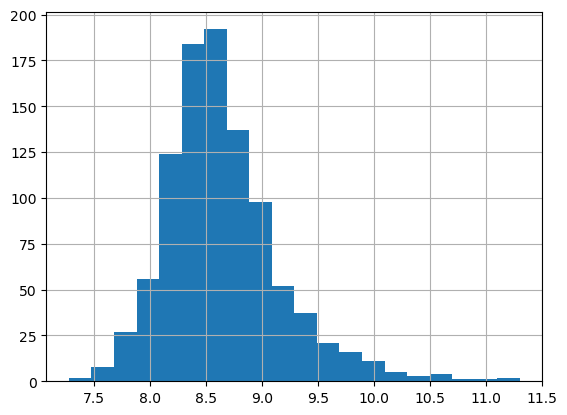

In [29]:
data["Total_income_log"]=np.log(data["Total_income"])
data["Total_income_log"].hist(bins=20)
#to normalize the data

In [30]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loanamount_log,Total_income,Total_income_log
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2,4.845892,5849.0,8.674026
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,4.189655,3000.0,8.006368
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,4.787492,4941.0,8.505323
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,4.948760,6000.0,8.699515


In [31]:
X=data.iloc[:614,] ## all the data in X (Train set)
y=Loan_status  ## Loan status will be our Y

In [32]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loanamount_log,Total_income,Total_income_log
90,1.0,1.0,0.0,1,0.0,2958,2900.0,131.0,360.0,1.0,1,4.875197,5858.0,8.675564
533,1.0,0.0,1.0,1,0.0,11250,0.0,196.0,360.0,0.0,1,5.278115,11250.0,9.328123
452,1.0,1.0,0.0,1,0.0,3948,1733.0,149.0,360.0,0.0,0,5.003946,5681.0,8.644883
355,0.0,0.0,0.0,1,0.0,3813,0.0,116.0,180.0,1.0,2,4.753590,3813.0,8.246172
266,1.0,1.0,2.0,1,0.0,4708,1387.0,150.0,360.0,1.0,1,5.010635,6095.0,8.715224


# Scaling the data 

In [34]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
train_X=ss.fit_transform(train_X)
test_X=ss.fit_transform(test_X)

In [35]:
train_X

array([[ 0.51206523,  0.71143163, -0.76304669, ...,  0.03577741,
        -0.18578759,  0.00958339],
       [ 0.51206523, -1.40561644,  0.22549137, ...,  0.83194193,
         0.59265746,  1.16625572],
       [ 0.51206523,  0.71143163, -0.76304669, ...,  0.29018536,
        -0.21134115, -0.04479911],
       ...,
       [ 0.51206523,  0.71143163,  2.2025675 , ...,  0.87186248,
         0.17167345,  0.63445755],
       [ 0.51206523,  0.71143163, -0.76304669, ...,  0.43093089,
        -0.16052278,  0.06175942],
       [-1.95287621,  0.71143163, -0.76304669, ...,  0.68550461,
        -0.095123  ,  0.19009237]])

# Applying model

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
# Define the pipelines for different classification algorithms
nb_pipeline = GaussianNB()
lr_pipeline = LogisticRegression()
dt_pipeline = DecisionTreeClassifier()
rf_pipeline = RandomForestClassifier()

In [38]:
# Define the grid of hyperparameters to search for each algorithm
nb_param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20)
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, None]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the GridSearchCV objects for each algorithm
nb_grid = GridSearchCV(nb_pipeline, nb_param_grid, cv=5)
lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)
dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)

In [41]:
# Fit each model and perform cross-validation to determine the best hyperparameters
nb_grid.fit(train_X, train_y)
print("Best hyperparameters for Naive Bayes:")
print(nb_grid.best_params_)
print("Accuracy score for Naive Bayes:")
print(nb_grid.best_score_)

lr_grid.fit(train_X, train_y)
print("Best hyperparameters for Logistic Regression:")
print(lr_grid.best_params_)
print("Accuracy score for Logistic Regression:")
print(lr_grid.best_score_)

dt_grid.fit(train_X, train_y)
print("Best hyperparameters for Decision Tree:")
print(dt_grid.best_params_)
print("Accuracy score for Decision Tree:")
print(dt_grid.best_score_)

rf_grid.fit(train_X, train_y)
print("Best hyperparameters for Random Forest:")
print(rf_grid.best_params_)
print("Accuracy score for Random Forest:")
print(rf_grid.best_score_)

Best hyperparameters for Naive Bayes:
{'var_smoothing': 0.001}
Accuracy score for Naive Bayes:
0.7555967841682127


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

Best hyperparameters for Logistic Regression:
{'C': 0.23357214690901212, 'penalty': 'l2'}
Accuracy score for Logistic Regression:
0.7616573902288188
Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 10}
Accuracy score for Decision Tree:
0.7026386312100598
Best hyperparameters for Random Forest:
{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy score for Random Forest:
0.7576169861884148


In [45]:
y_pred=lr_grid.predict(test_X)

In [46]:
print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))
print("\nClassification Report:")
print(classification_report(test_y, y_pred))

Confusion Matrix:
[[16 17]
 [ 9 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.48      0.55        33
           1       0.83      0.90      0.86        90

    accuracy                           0.79       123
   macro avg       0.73      0.69      0.71       123
weighted avg       0.78      0.79      0.78       123



# Conclusion


# We have used Logistic regression as it is very efficient in handling imbalanced datasets,which is the case in loan eligibility problems also it efficiently handles outliers hence makes it more suitable for our model